In [149]:
from coronadata import getdata
import matplotlib.pyplot as plt
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from collections import Counter

import numpy as np
from scipy.stats import norm, weibull_min, skewnorm

import datetime
from tqdm import tqdm

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
rki = getdata.get_rki()

  0%|                                                                                          | 0/706 [00:00<?, ?it/s]

Querying data from RKI...


100%|█████████████████████████████████████████████████████████████████████████████| 707/707 [00:00<00:00, 19119.35it/s]

Creating pandas dataframe...


In [4]:
rki.raw_data.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen
0,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2815715,2020-03-14,01001,"19.04.2020, 00:00 Uhr",0,-9,2020-03-16,0,1
1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2815716,2020-03-19,01001,"19.04.2020, 00:00 Uhr",0,-9,2020-03-13,0,1
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2815717,2020-03-19,01001,"19.04.2020, 00:00 Uhr",0,-9,2020-03-16,0,1
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2815718,2020-03-21,01001,"19.04.2020, 00:00 Uhr",0,-9,2020-03-13,0,1
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2815719,2020-03-27,01001,"19.04.2020, 00:00 Uhr",0,-9,2020-03-22,0,1


In [60]:
df = rki.raw_data.groupby(['Meldedatum']).sum()
df.reset_index(inplace=True)
df['Cases confirmed'] = df['AnzahlFall'].cumsum()
df['Cases deaths'] = df['AnzahlTodesfall'].cumsum()

df['Cases non-lethal'] = df['AnzahlFall'] - df['AnzahlTodesfall']

In [64]:
df.tail(10)

,Meldedatum,IdBundesland,AnzahlFall,AnzahlTodesfall,ObjectId,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,Cases confirmed,Cases deaths,Cases non-lethal
57,2020-04-09,26449,4877,146,10148412144,7,-30617,-19870,1420,118183,3874,4731
58,2020-04-10,18482,3285,69,7035877417,9,-21464,-16089,718,121468,3943,3216
59,2020-04-11,15362,2914,60,5898435282,7,-17965,-14351,481,124382,4003,2854
60,2020-04-12,10403,1822,54,3946639283,3,-11891,-10377,228,126204,4057,1768
61,2020-04-13,8884,1585,56,3437161413,1,-10310,-9280,179,127789,4113,1529
62,2020-04-14,14137,2383,68,5396119394,0,-16331,-14441,277,130172,4181,2315
63,2020-04-15,17823,3230,48,6917611488,29,-21274,-19091,293,133402,4229,3182
64,2020-04-16,18843,3228,43,7182427418,193,-22168,-20184,252,136630,4272,3185
65,2020-04-17,13234,2507,19,5047165707,899,-15658,-14414,152,139137,4291,2488
66,2020-04-18,4495,698,2,1518519060,524,-4723,-4603,14,139835,4293,696


In [62]:
df.describe()

,IdBundesland,AnzahlFall,AnzahlTodesfall,ObjectId,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,Cases confirmed,Cases deaths,Cases non-lethal
count,67.000000,67.000000,67.000000,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11869.029851,2087.089552,64.074627,4.535642e+09,26.298507,-13687.835821,-4673.208955,1312.149254,40761.731343,1196.985075,2023.014925
std,12356.254955,2158.761161,84.166558,4.668406e+09,127.641427,13982.677812,6451.388053,1565.119922,49971.963036,1611.509047,2080.641732
min,5.000000,1.000000,0.000000,2.833995e+06,-1.000000,-41586.000000,-20184.000000,1.000000,2.000000,0.000000,1.000000
25%,150.000000,29.000000,0.000000,7.539269e+07,0.000000,-24388.000000,-8910.000000,21.000000,115.000000,0.000000,29.000000
50%,7887.000000,1421.000000,18.000000,3.159132e+09,0.000000,-9810.000000,-275.000000,337.000000,9344.000000,110.000000,1408.000000
75%,20813.000000,3674.000000,104.000000,8.094562e+09,4.000000,-238.500000,0.000000,2438.000000,82945.000000,2539.500000,3533.000000
max,37348.000000,6536.000000,287.000000,1.400190e+10,899.000000,-9.000000,1.000000,4538.000000,139835.000000,4293.000000,6249.000000


In [63]:
total_cases = df['Cases non-lethal'].sum()
total_cases

135542

In [66]:
dates = []
for i in df[['Meldedatum', 'Cases non-lethal']].iterrows():
    for n in range(i[1]['Cases non-lethal']):
        dates.append(i[1]['Meldedatum'])

In [143]:
df_recovery = pd.DataFrame(dates, columns=['Infection Date'])

In [144]:
df_recovery

,Infection Date
0,2020-01-28
1,2020-01-28
2,2020-01-29
3,2020-01-29
4,2020-01-31
...,...
135537,2020-04-18
135538,2020-04-18
135539,2020-04-18
135540,2020-04-18


In [154]:
d_recovery_random = []
d_recovery_025 = []
d_recovery_975 = []

d_025 = skewnorm.ppf(.025, 4, loc=9.40, scale=7.17)
d_975 = skewnorm.ppf(.975, 4, loc=9.40, scale=7.17)

for i in tqdm(range(df_recovery.shape[0])):
    d_recovery = skewnorm.rvs(4, size=1, loc=9.40, scale=7.17)[0]
    
#     date_random = x['Infection Date'] + datetime.timedelta(int(d_recovery))



  1%|▍                                                                           | 824/135542 [00:07<21:39, 103.71it/s]


KeyboardInterrupt: 

In [156]:
d_025 = skewnorm.ppf(.025, 4, loc=9.40, scale=7.17)
d_975 = skewnorm.ppf(.975, 4, loc=9.40, scale=7.17)

def estimate_recovery_date(x):
    d_recovery = skewnorm.rvs(4, size=1, loc=9.40, scale=7.17)[0]
    date_random = x['Infection Date'] + datetime.timedelta(int(d_recovery))
        
    date_025 = x['Infection Date'] + datetime.timedelta(int(d_025))
        
    date_975 = x['Infection Date'] + datetime.timedelta(int(d_975))
    
    return date_random, date_025, date_975

df_recovery['Recovery Date'], df_recovery['Recovery Date 2.5%'], df_recovery['Recovery Date 97.5%']= zip(*df_recovery.apply(estimate_recovery_date, axis=1))

In [134]:
datetime.timedelta(int(d_025))

datetime.timedelta(25)

In [157]:
df_recovery['Cases Recovered'] = 1

In [173]:
df_recovery.sort_values(by='Recovery Date', inplace=True)
df_recovery.tail()

,Infection Date,Recovery Date,Recovery Date 2.5%,Recovery Date 97.5%,Cases Recovered
116286,2020-04-10,2020-05-23,2020-04-18,2020-05-05,1
133448,2020-04-17,2020-05-23,2020-04-25,2020-05-12,1
135146,2020-04-18,2020-05-23,2020-04-26,2020-05-13,1
133684,2020-04-17,2020-05-26,2020-04-25,2020-05-12,1
130467,2020-04-16,2020-05-27,2020-04-24,2020-05-11,1


In [174]:
df2 = df_recovery.groupby(['Recovery Date']).sum()
df2.reset_index(inplace=True)
df2['Cases Recovered (total)'] = df2['Cases Recovered'].cumsum()
df2.set_index('Recovery Date', inplace=True)
df2

,Cases Recovered,Cases Recovered (total)
Recovery Date,,
2020-02-03,1,1
2020-02-11,1,2
2020-02-12,3,5
2020-02-13,3,8
2020-02-14,2,10
...,...,...
2020-05-21,4,135536
2020-05-22,1,135537
2020-05-23,3,135540


In [175]:
df3 = df_recovery.groupby(['Recovery Date 2.5%']).sum()
df3.reset_index(inplace=True)
df3['Cases Recovered (2.5%)'] = df3['Cases Recovered'].cumsum()
df3.set_index('Recovery Date 2.5%', inplace=True)
df3

,Cases Recovered,Cases Recovered (2.5%)
Recovery Date 2.5%,,
2020-02-05,2,2
2020-02-06,2,4
2020-02-08,4,8
2020-02-11,1,9
2020-02-12,5,14
...,...,...
2020-04-22,2315,125991
2020-04-23,3182,129173
2020-04-24,3185,132358


In [176]:
df4 = df_recovery.groupby(['Recovery Date 97.5%']).sum()
df4.reset_index(inplace=True)
df4['Cases Recovered (97.5%)'] = df4['Cases Recovered'].cumsum()
df4.set_index('Recovery Date 97.5%', inplace=True)
df4

,Cases Recovered,Cases Recovered (97.5%)
Recovery Date 97.5%,,
2020-02-22,2,2
2020-02-23,2,4
2020-02-25,4,8
2020-02-28,1,9
2020-02-29,5,14
...,...,...
2020-05-09,2315,125991
2020-05-10,3182,129173
2020-05-11,3185,132358


In [180]:
df_total = df.set_index('Meldedatum').join(df2)
df_total['Active Cases'] = df_total['Cases confirmed'] - df_total['Cases deaths'] - df_total['Cases Recovered (total)']

df_total = df_total.join(df3, lsuffix='', rsuffix='_2.5%')
df_total['Active Cases (2.5%)'] = df_total['Cases confirmed'] - df_total['Cases deaths'] - df_total['Cases Recovered (2.5%)']

df_total = df_total.join(df4, lsuffix='', rsuffix='_97.5%')
df_total['Active Cases (97.5%)'] = df_total['Cases confirmed'] - df_total['Cases deaths'] - df_total['Cases Recovered (97.5%)']


In [181]:
df_total.tail()

,IdBundesland,AnzahlFall,AnzahlTodesfall,ObjectId,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlGenesen,Cases confirmed,Cases deaths,Cases non-lethal,Cases Recovered,Cases Recovered (total),Active Cases,Cases Recovered_2.5%,Cases Recovered (2.5%),Active Cases (2.5%),Cases Recovered_97.5%,Cases Recovered (97.5%),Active Cases (97.5%)
Meldedatum,,,,,,,,,,,,,,,,,,,,
2020-04-14,14137,2383,68,5396119394,0,-16331,-14441,277,130172,4181,2315,4777.0,70351.0,55640.0,3491.0,99550.0,26441.0,3961.0,23572.0,102419.0
2020-04-15,17823,3230,48,6917611488,29,-21274,-19091,293,133402,4229,3182,4833.0,75184.0,53989.0,4952.0,104502.0,24671.0,3197.0,26769.0,102404.0
2020-04-16,18843,3228,43,7182427418,193,-22168,-20184,252,136630,4272,3185,4620.0,79804.0,52554.0,5076.0,109578.0,22780.0,2230.0,28999.0,103359.0
2020-04-17,13234,2507,19,5047165707,899,-15658,-14414,152,139137,4291,2488,4669.0,84473.0,50373.0,4731.0,114309.0,20537.0,3575.0,32574.0,102272.0
2020-04-18,4495,698,2,1518519060,524,-4723,-4603,14,139835,4293,696,4567.0,89040.0,46502.0,3216.0,117525.0,18017.0,4636.0,37210.0,98332.0


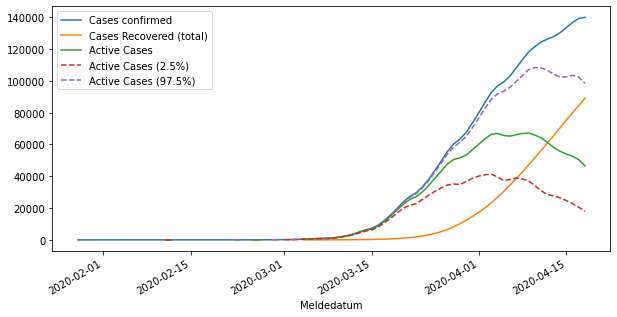

In [185]:
fig, ax = plt.subplots(figsize=(10, 5))
df_total.plot(y='Cases confirmed', ax=ax)
df_total.plot(y='Cases Recovered (total)', ax=ax)
df_total.plot(y='Active Cases', ax=ax)
df_total.plot(y='Active Cases (2.5%)', ax=ax, linestyle='--')
df_total.plot(y='Active Cases (97.5%)', ax=ax, linestyle='--')

(array([7.17651984e-04, 3.05002093e-03, 1.39942137e-02, 3.02310898e-02,
        6.26151356e-02, 7.98387832e-02, 9.44609424e-02, 8.97064980e-02,
        8.85403135e-02, 8.28888042e-02, 7.40975674e-02, 6.01930602e-02,
        5.13121169e-02, 4.37767710e-02, 3.14869808e-02, 2.61045909e-02,
        1.91074841e-02, 1.33662682e-02, 9.95742128e-03, 7.17651984e-03,
        5.11327039e-03, 2.60148844e-03, 2.33236895e-03, 1.43530397e-03,
        1.43530397e-03, 4.48532490e-04, 7.17651984e-04, 1.79412996e-04,
        8.97064980e-05, 8.97064980e-05]),
 array([ 4.4453929 ,  5.56013934,  6.67488579,  7.78963224,  8.90437869,
        10.01912513, 11.13387158, 12.24861803, 13.36336448, 14.47811093,
        15.59285737, 16.70760382, 17.82235027, 18.93709672, 20.05184317,
        21.16658961, 22.28133606, 23.39608251, 24.51082896, 25.6255754 ,
        26.74032185, 27.8550683 , 28.96981475, 30.0845612 , 31.19930764,
        32.31405409, 33.42880054, 34.54354699, 35.65829343, 36.77303988,
        37.88778

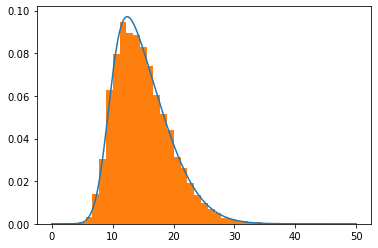

In [24]:
x = np.linspace(0,50, num=500)
y = skewnorm.pdf(x, 4, loc=9.40, scale=7.17)
# y = weibull_min.pdf(x, c=1.7, loc=9.40, scale=7.17)
plt.plot(x, y)
plt.hist(y_test, bins=30, density=True)

In [110]:
skewnorm.ppf(.975, 4, loc=9.40, scale=7.17)
skewnorm.ppf(.025, 4, loc=9.40, scale=7.17)
skewnorm.ppf(.5, 4, loc=9.40, scale=7.17)

14.234268366971065